<a href="https://colab.research.google.com/github/jhonda18/Python3/blob/main/Clase_8_20210612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción al Machine Learning

En los últimos años, el aprendizaje automático se ha dado a conocer por sus grandes logros, un ejemplo de esto, es el tan conocido clasificador de *Spam*. Aunque el aprendizaje automático ha cogido mucha fuerza en los últimos años, muchos de los algoritmos ya existían desde hace mucho tiempo.

Algo muy común es creer que el aprendizaje automático es Inteligencia Artificial, si bien es una rama de la inteligencia artificial, y existe una retroalimentación constante entre ML e IA, no todas las aplicaciones de ML terminan en IA.

**¿Que es Machine Learning?**

El Machine Learning es la ciencia (y el arte) de programar ordenadores para que aprendan a partir de los datos. Algunas definiciones:

* El ML es el campo de estudio que da a los ordenadores la capacidad de aprender sin ser programados de manera explícita. (**Arthur Samuel, 1959**)
* Se dice que un programa de ordenador aprende de la experiencia **E**, con respecto a una tarea **T** y una medida de rendimiento **R**, si su rendimiento en **T**, medido por **R**, mejora con la experiencia **E**. (**Tom Mitchell, 1997**)

## Tipos de aprendizaje

* Aprendizaje supervisado
    * Clasificación.
        * Clasificación binaria.
        * Clasificación multiclase.
    * Regresión.

* Aprendizaje no supervisado.
    * Clustering.
    * Reducción de la dimensionalidad.
    * Detección de anomalías.

* Aprendizaje semi-supervisado
* Aprendizaje por refuerzo

### Aprendizaje supervisado

Los algoritmos de aprendizaje supervisado están diseñados para aprender mediante ejemplos con sus respectivas respuestas. Contamos con datos de entrada, en general de forma estructurada, es decir, tenemos muchas observaciones con columnas (variables) y dentro de esos datos, existe una variable que queremos predecir. Por ejemplo, dadas ciertas características de mediciones queremos predecir si una persona tiene diabetes o no.

El flujo sel aprendizaje supervisado es así:

* Tomamos nuestros datos y separamos en variables independientes (predictoras) ***X***, y en una variable ***y*** que queremos predecir (variable dependiente).
* Mostramos pares *(x, y)* a un algoritmo preparado para aprender de nuestros datos, de forma tal que crea un conjunto de reglas o asociaciones para, dada una entrada ***x***, predecir ***y***.
* Cuando el modelo está entranado, queremos que el modelo haga una predicción sobre datos no observados.

Cuando nuestra variable de interés es una categoría, significa que tenemos un problema de **clasificación**. Si nuestra variable de interés es una variable numérica continua, tenemos un problema de **regresión**.

#### Regresión

Wikipedia define el análisis de regresión como:

En estadística, el análisis de regresión es un proceso estadístico para estimar las relaciones entre variables. Incluye muchas técnicas para el modelado y análisis de diversas variables, cuando la atención se centra en la relación entre una variable dependiente y una o más variables indepndientes (o predictoras).

##### Regresión lineal simple

La ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente, $m$ la llamada pendiente y $b$ intercepto (o bias en Machine Learning).

En el Machine Learning podemos reescribir la ecuación como:

$$y=w_0+w_1x$$

Siendo $w_0$ y $w_1$ los parámetros del modelo.

**¿Cómo encontramos los parámetros óptimos?**

Hay varios algoritmos para resolver está tarea, el más simple es usar el algoritmo de mínimos cuadrados.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)


In [ ]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

pd.set_option("float_format", "{:.2f}".format)
warnings.filterwarnings(action="ignore")

In [ ]:
auto = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/Modulo-Python-3/master/data/mpg.csv", dtype={"model_year": "category"})
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.00,8,307.00,130.00,3504,12.00,70,usa,chevrolet chevelle malibu
1,15.00,8,350.00,165.00,3693,11.50,70,usa,buick skylark 320
2,18.00,8,318.00,150.00,3436,11.00,70,usa,plymouth satellite
3,16.00,8,304.00,150.00,3433,12.00,70,usa,amc rebel sst
4,17.00,8,302.00,140.00,3449,10.50,70,usa,ford torino


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    object  
 8   name          398 non-null    object  
dtypes: category(1), float64(4), int64(2), object(2)
memory usage: 25.5+ KB


In [ ]:
# Estadística descriptiva

auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.00,398.00,398.00,392.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57
std,7.82,1.70,104.27,38.49,846.84,2.76
min,9.00,3.00,68.00,46.00,1613.00,8.00
25%,17.50,4.00,104.25,75.00,2223.75,13.83
50%,23.00,4.00,148.50,93.50,2803.50,15.50
75%,29.00,8.00,262.00,126.00,3608.00,17.17
max,46.60,8.00,455.00,230.00,5140.00,24.80


In [ ]:
auto.describe(exclude="number")

,model_year,origin,name
count,398,398,398
unique,13,3,305
top,73,usa,ford pinto
freq,40,249,6


In [ ]:
indices = auto.sample(n=4, random_state=42).index

auto.loc[indices, "origin"] = np.nan

In [ ]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          4
name            0
dtype: int64

In [ ]:
auto["origin"].value_counts(normalize=True)

usa      0.62
japan    0.20
europe   0.18
Name: origin, dtype: float64

In [ ]:
mpg = auto.pop("mpg")

train_data, test_data, train_mpg, test_mpg = train_test_split(auto, mpg,
                                                              train_size=0.7)

In [ ]:
print(f"El set de entrenamiento tiene {train_data.shape[0]} observaciones, y {train_data.shape[1]} columnas (variables).")
print(f"El set de prueba tiene {test_data.shape[0]} observaciones, y {test_data.shape[1]} columnas (variables).")

El set de entrenamiento tiene 278 observaciones, y 8 columnas (variables).
El set de prueba tiene 120 observaciones, y 8 columnas (variables).


In [ ]:
cols_to_drop = ["model_year", "name"]

train_data.drop(labels=cols_to_drop, axis=1, inplace=True)
test_data.drop(labels=cols_to_drop, axis=1, inplace=True)

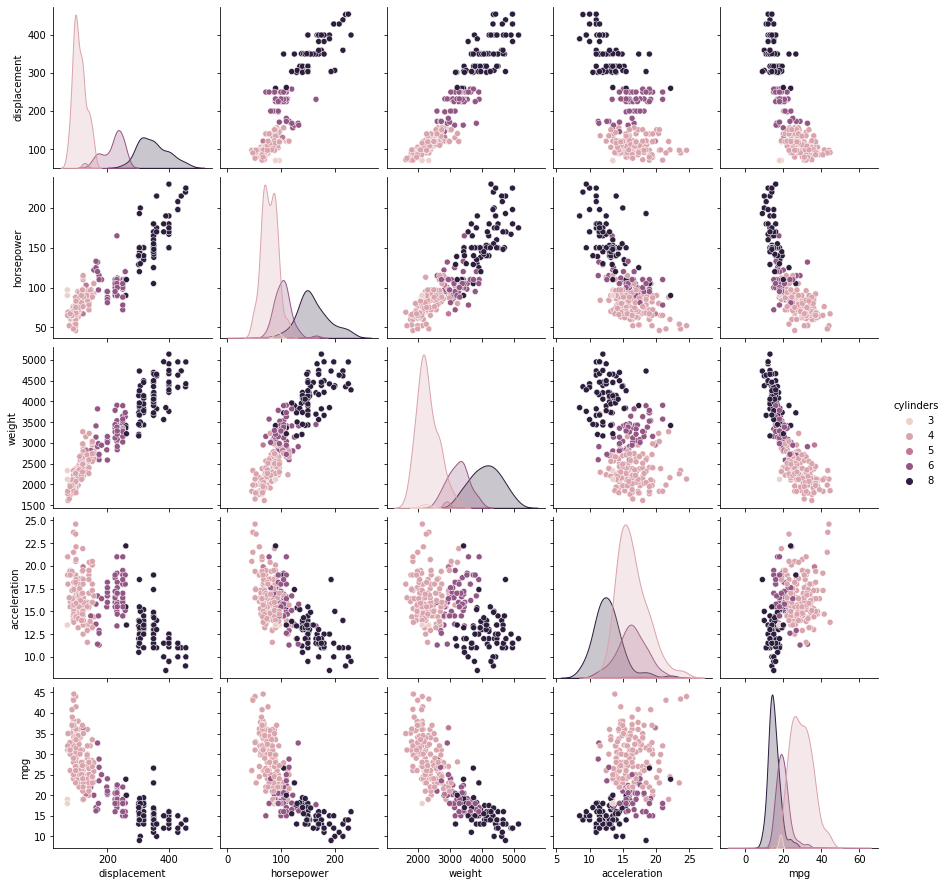

In [ ]:
sns.pairplot(pd.concat(objs=[train_data, train_mpg], axis=1), hue="cylinders")

In [ ]:
linear_reg = LinearRegression(normalize=True)

linear_reg.fit(train_data["displacement"].values.reshape(-1, 1), train_mpg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(f"El intercepto es: {round(linear_reg.intercept_, 2)}")
print(f"El beta (coeficiente) de displacement es: {round(linear_reg.coef_[0], 2)}")

El intercepto es: 35.31
El beta (coeficiente) de displacement es: -0.06


[Regresión lineal con Statsmodels](https://www.statsmodels.org/stable/regression.html)

In [ ]:
print(f"El r2 en los datos de entrenamiento es: {round(linear_reg.score(train_data['displacement'].values.reshape(-1, 1), train_mpg), 2)}")

El r2 en los datos de entrenamiento es: 0.65


##### Regresión lineal multiple

A veces no es tan sencillo usar una variable como predictora para ayudar a explicar algún fénomeno. En este caso podemos usar la generalización de la regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:

$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el peso del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

In [ ]:
train_data.isna().sum()

cylinders       0
displacement    0
horsepower      3
weight          0
acceleration    0
origin          3
dtype: int64

In [ ]:
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "acceleration"]
categorical_features = ["origin"]

* Imputamos datos numericos
* Imputamos datos categoricos


In [ ]:
numeric_imputer = SimpleImputer(strategy="median")
categoric_imputer = SimpleImputer(strategy="most_frequent")

train_data.loc[:, numerical_features] = numeric_imputer.fit_transform(train_data[numerical_features])
train_data.loc[:, categorical_features] = categoric_imputer.fit_transform(train_data[categorical_features])

In [ ]:
train_data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [ ]:
train_data = pd.get_dummies(data=train_data, columns=categorical_features, drop_first=True)
train_data

,cylinders,displacement,horsepower,weight,acceleration,origin_japan,origin_usa
291,8.00,267.00,125.00,3605.00,15.00,0,1
307,6.00,173.00,115.00,2700.00,12.90,0,1
392,4.00,151.00,90.00,2950.00,17.30,0,1
216,4.00,98.00,68.00,2045.00,18.50,1,0
12,8.00,400.00,150.00,3761.00,9.50,0,1
...,...,...,...,...,...,...,...
359,4.00,141.00,80.00,3230.00,20.40,0,0
167,4.00,97.00,75.00,2171.00,16.00,1,0
44,8.00,400.00,175.00,5140.00,12.00,0,1
137,8.00,350.00,150.00,4699.00,14.50,0,1


In [ ]:
linear_regr = LinearRegression(normalize=True).fit(train_data, train_mpg)

In [ ]:
features = numerical_features + ["japan", "usa"]

print(f"El intercepto es: {round(linear_regr.intercept_, 2)}")
for feature, beta in zip(features, linear_regr.coef_):
  print(f"El coeficiente para {feature} es: {round(beta, 2)}")

El intercepto es: 44.8
El coeficiente para cylinders es: -0.42
El coeficiente para displacement es: 0.01
El coeficiente para horsepower es: -0.04
El coeficiente para weight es: -0.01
El coeficiente para acceleration es: 0.01
El coeficiente para japan es: 1.24
El coeficiente para usa es: -1.38


In [ ]:
print(f"El r2 en entrenamiento es: {round(linear_regr.score(train_data, train_mpg), 2)}")

El r2 en entrenamiento es: 0.71


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5).fit(train_data, train_mpg)

print(f"El r2 en entrenamiento es: {round(knn.score(train_data, train_mpg), 2)}")

El r2 en entrenamiento es: 0.79
